In [1]:
import numpy as np
import pandas as pd
from albumentations.pytorch import ToTensorV2
import albumentations
from pathlib import Path

from matplotlib import pyplot as plt

from detect_sleep_states.classify_segment.data_module import SleepDataModule

In [2]:
data_mod = SleepDataModule(
    batch_size=8,
    data_path=Path('/Users/adam.amster/Downloads/train_series_clean.parquet'),
    meta_path=Path('/Users/adam.amster/Downloads/train.csv'),
    num_workers=0,
    train_transform=albumentations.Compose([
        albumentations.Normalize(mean=0, std=1),
        ToTensorV2()
    ]),
    inference_transform=albumentations.Compose([
        albumentations.Normalize(mean=0, std=1),
        ToTensorV2()
    ])
)
data_mod.setup(stage='fit')

In [3]:
data_loader = iter(data_mod.train_dataloader())

In [15]:
data, target = next(data_loader)

In [16]:
target

tensor([2, 1, 2, 1, 0, 1, 1, 3])

In [9]:
print(data['series_id'][0])
print(data['start'][0])
print(data['end'][0])

9b9cd7b7af8c
tensor(217100)
tensor(217820)


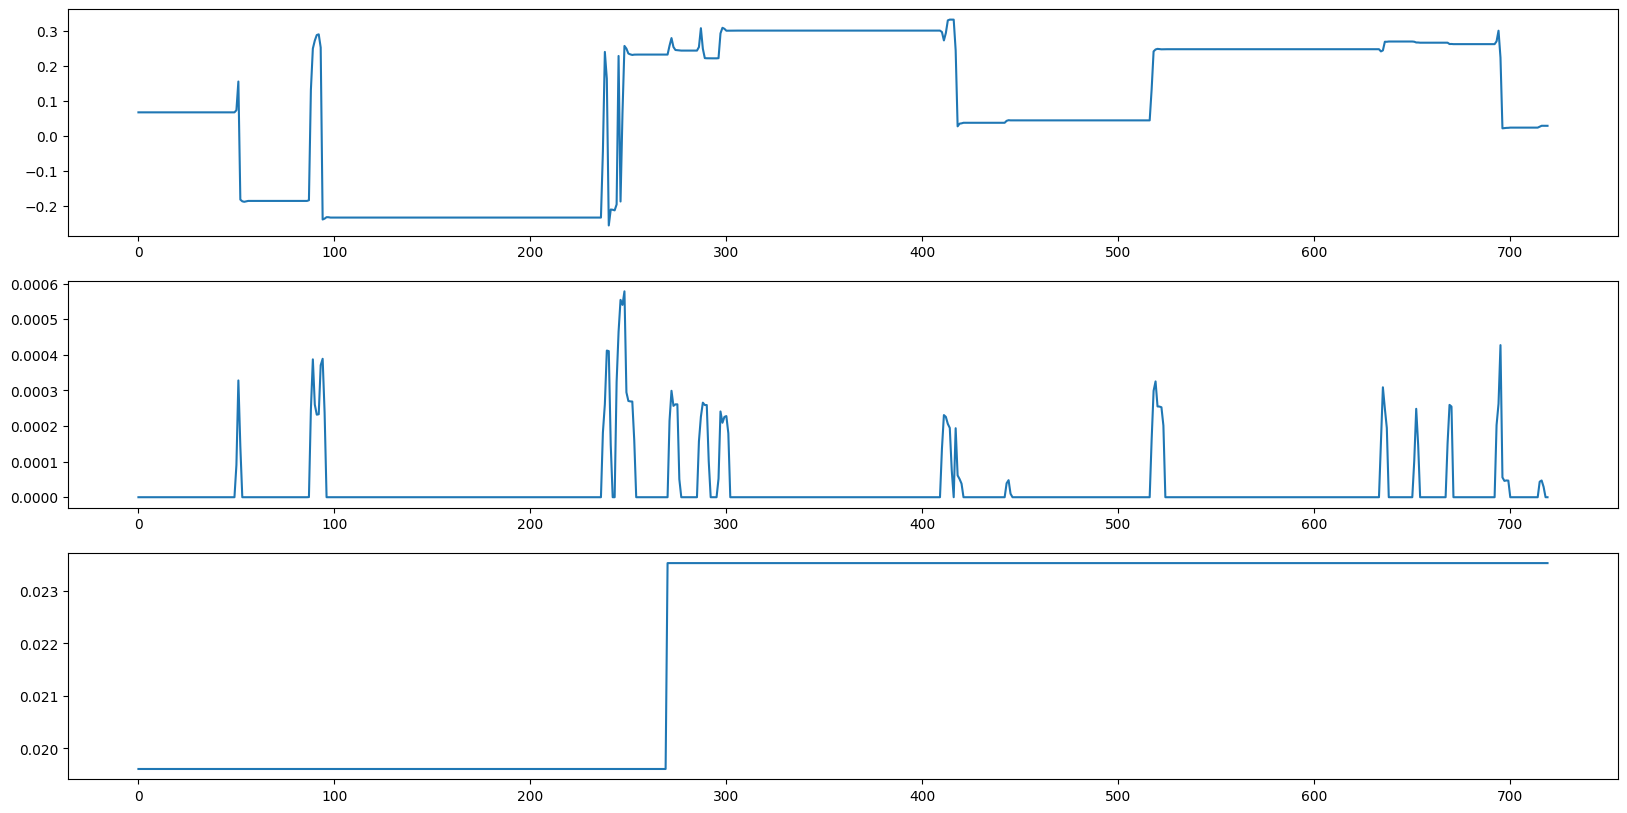

In [18]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 10))
ax[0].plot(np.arange(data['sequence'].shape[-1]), data['sequence'][4][0][0])
ax[1].plot(np.arange(data['sequence'].shape[-1]), data['sequence'][4][0][1])
ax[2].plot(np.arange(data['sequence'].shape[-1]), data['sequence'][4][0][2])
plt.show()

In [11]:
events = pd.read_csv('~/Downloads/child-mind-institute-detect-sleep-states/train_events.csv')
events = events.set_index('series_id')
events.loc['d9e887091a5c']

,night,event,step,timestamp
series_id,,,,
d9e887091a5c,1,onset,4860.0,2018-12-17T23:00:00-0500
d9e887091a5c,1,wakeup,10608.0,2018-12-18T06:59:00-0500
d9e887091a5c,2,onset,NaN,NaN
d9e887091a5c,2,wakeup,NaN,NaN
d9e887091a5c,3,onset,38112.0,2018-12-19T21:11:00-0500
d9e887091a5c,3,wakeup,45132.0,2018-12-20T06:56:00-0500
d9e887091a5c,4,onset,55320.0,2018-12-20T21:05:00-0500
d9e887091a5c,4,wakeup,62448.0,2018-12-21T06:59:00-0500
d9e887091a5c,5,onset,73932.0,2018-12-21T22:56:00-0500


In [8]:
meta = pd.read_csv('~/Downloads/train.csv')
meta = meta.set_index('series_id').sort_values('night')
meta.loc['3452b878e596']

,start,end,night,label
series_id,,,,
3452b878e596,8796,8796,1,onset
3452b878e596,8796,15072,1,sleep
3452b878e596,0,8795,1,awake
3452b878e596,27156,27156,2,onset
3452b878e596,27156,31044,2,sleep
...,...,...,...,...
3452b878e596,508500,514620,30,sleep
3452b878e596,514621,526223,31,awake
3452b878e596,514621,514621,31,wakeup


In [8]:
data_mod.train_dataloader().dataset._series.loc['3452b878e596'].iloc[184418:185138]

,step,timestamp,anglez,enmo
series_id,,,,
d9e887091a5c,184418,2018-12-28T08:23:10-0500,31.355499,0.0437
d9e887091a5c,184419,2018-12-28T08:23:15-0500,27.266701,0.0491
d9e887091a5c,184420,2018-12-28T08:23:20-0500,27.543100,0.0422
d9e887091a5c,184421,2018-12-28T08:23:25-0500,15.662100,0.0132
d9e887091a5c,184422,2018-12-28T08:23:30-0500,19.771601,0.0596
...,...,...,...,...
d9e887091a5c,185133,2018-12-28T09:22:45-0500,-3.883300,0.0302
d9e887091a5c,185134,2018-12-28T09:22:50-0500,-2.692200,0.0297
d9e887091a5c,185135,2018-12-28T09:22:55-0500,-5.159600,0.0724
